# Starter code for the Outliers Mini-Project

In [14]:
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load up some practice data with outliers in it

In [15]:
with open('practice_outliers_ages_unix.pkl', 'rb') as f:
    ages = pickle.load(f)
    
with open('practice_outliers_net_worths_unix.pkl', 'rb') as f:
    net_worths = pickle.load(f)

- ages and net_worths need to be reshaped into 2D numpy arrays
- second argument of reshape command is a tuple of integers: `(n_rows, n_columns)`
- by convention, `n_rows` is the number of data points
- and `n_columns` is the number of features

In [16]:
from sklearn.model_selection import train_test_split

ages = np.reshape(np.array(ages), (len(ages), 1))
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

## ↓↓↓ Your Code Goes Here ↓↓↓

Fill in a regression here!  Name the regression object `reg` so that the plotting code below works, and you can see what your regression looks like

In [17]:
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

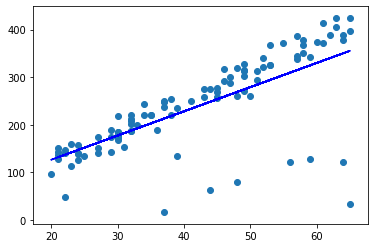

In [18]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

In [19]:
print(reg.coef_)

[[5.07793064]]


In [20]:
print(reg.score(ages_test, net_worths_test))

0.8782624703664675


## Identify and remove the most outlier-y points

In [21]:
# print("predictions:", reg.predict(ages_train))

In [40]:
def outlier_cleaner(predictions, ages, net_worths):
    """Clean away the 10% of points that have the largest
    residual errors (difference between the prediction
    and the actual net worth).

    Return a list of tuples named cleaned_data where
    each tuple is of the form (age, net_worth, error).
    """
    cleaned_data = []

    #=== Your Code Goes Here ===#
    
    errors = abs(predictions - net_worths)
    sorted_errors = sorted(errors, reverse=True)
#     print("sorted errors:", sorted_errors)

    for i in range(len(predictions)):
        age = int(ages[i])
        actual_net_worth = float(net_worths[i])
        pred_net_worth = float(predictions[i])
        error = abs(pred_net_worth - actual_net_worth)
        if error not in sorted_errors[:9]:
            cleaned_data.append((int(age), float(actual_net_worth), float(error)))
    
    print("cleaned_data:", cleaned_data)

    return cleaned_data

In [41]:
cleaned_data = []

try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlier_cleaner(predictions, ages_train, net_worths_train)
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")
    
print("size of cleaned_data:", len(cleaned_data))

cleaned_data: [(57, 338.08951848957577, 23.437450267845293), (57, 344.21586775541203, 29.56379953368156), (34, 243.79287311628013, 45.93320969367559), (64, 378.84578142088196, 28.648198695069595), (25, 133.88384977349668, 18.274437858145546), (53, 326.56693250553326, 32.2265868575638), (62, 389.24094136476344, 49.199219925831585), (41, 250.26985299068266, 16.864675063996287), (21, 136.08924543132068, 4.242680373439498), (53, 368.29556369017877, 73.95521804220931), (48, 318.62560238232396, 49.674909951555776), (24, 139.40479592465923, 7.6755610635427445), (24, 126.98012845155395, 20.100228536648018), (30, 185.1870343522352, 7.639093503391678), (32, 187.0976049078975, 0.6061972278265273), (45, 270.00424941518054, 16.287348914733144), (52, 339.7693315999082, 50.50691659537898), (21, 142.1012008717193, 10.25463581383812), (60, 374.28347921780096, 44.39761906574961), (43, 259.43540492859483, 15.874365715027949), (32, 221.1424445243783, 33.43864238865427), (30, 177.46485912830926, 0.08308172

**Only run this code if `cleaned_data` is returning data**

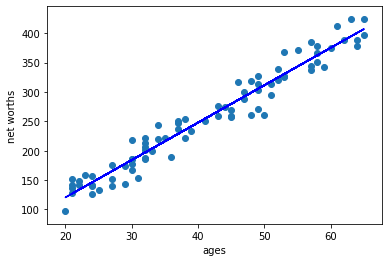

new slope: [[6.36859481]]


In [44]:
if cleaned_data:
    ages = [i[0] for i in cleaned_data]
    net_worths = [i[1] for i in cleaned_data]
    errors = [i[2] for i in cleaned_data]
#     ages, net_worths, errors = cleaned_data
    ages = np.reshape(np.array(ages), (len(ages), 1))
    net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

    # Refit your cleaned data!

    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")

    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print("outlier_cleaner() is returning an empty list, no refitting to be done")

print("new slope:", reg.coef_)

In [46]:
print("new score:", reg.score(ages_test, net_worths_test))

new score: 0.983189455395532


## Enron Outliers

In [47]:
import sys
import pickle
import matplotlib.pyplot

sys.path.append("../utils/")

from feature_format import feature_format, target_feature_split

read in data dictionary, convert to numpy array

In [76]:
with open('../17-final-project/final_project_dataset_unix.pkl', 'rb') as f:
    data_dict = pickle.load(f)

features = ["salary", "bonus"]
data_dict.pop("TOTAL")
data = feature_format(data_dict, features)

## ↓↓↓ Your Code Goes Here ↓↓↓

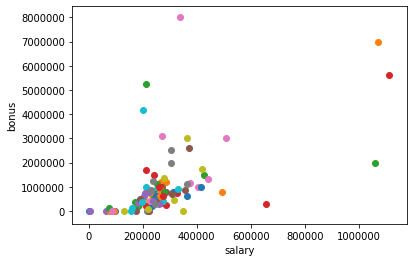

In [77]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [53]:
print(data_dict)

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 38, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 702, 'restricted_stock': 585062, 'director_fees': 'NaN'}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'loan_advances': 'NaN', 'bonus': 1200000, 'email_address': 'NaN', 'restricted_stock_deferred': 'NaN', 'deferred_income': -1386055, 'total_stock_value': 10623258, 'expenses': 11200, 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 6680544, 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN

In [78]:
bonuses = []

for k, v in data_dict.items():
    bonus = v["bonus"]
    salary = v["salary"]
    if bonus == "NaN":
        continue
    if salary == "NaN":
        continue
    else:
        print(k, "bonus:", bonus)



METTS MARK bonus: 600000
BAXTER JOHN C bonus: 1200000
ELLIOTT STEVEN bonus: 350000
HANNON KEVIN P bonus: 1500000
MORDAUNT KRISTINA M bonus: 325000
MCMAHON JEFFREY bonus: 2600000
HAEDICKE MARK E bonus: 1150000
PIPER GREGORY F bonus: 400000
BLACHMAN JEREMY M bonus: 850000
SUNDE MARTIN bonus: 700000
COLWELL WESLEY bonus: 1200000
MULLER MARK S bonus: 1100000
JACKSON CHARLENE R bonus: 250000
WALLS JR ROBERT H bonus: 850000
KITCHEN LOUISE bonus: 3100000
SHANKMAN JEFFREY A bonus: 2000000
BERGSIEKER RICHARD P bonus: 250000
BIBI PHILIPPE A bonus: 1000000
RIEKER PAULA H bonus: 700000
BECK SALLY W bonus: 700000
ECHOLS JOHN B bonus: 200000
HICKERSON GARY J bonus: 1700000
KOPPER MICHAEL J bonus: 800000
LEFF DANIEL P bonus: 1000000
LAVORATO JOHN J bonus: 8000000
DETMERING TIMOTHY J bonus: 425000
GOLD JOSEPH bonus: 750000
SHAPIRO RICHARD S bonus: 650000
SHERRIFF JOHN R bonus: 1500000
SHELBY REX bonus: 200000
DEFFNER JOSEPH M bonus: 600000
WHALLEY LAWRENCE G bonus: 3000000
MCCONNELL MICHAEL S bonus: 1